# Ejercicio Práctico de Regresión

**Objetivo y descripción del problema**

El **objetivo** del problema es implementar modelos de regresión para 3 datasets distintos, evaluando la bondad de sus predicciones y cuantificando los errores producidos por los modelos.

Para ello, se van a seguir los siguientes pasos:

- Comprensión del problema y carga de datos
- Preprocesado y análisis inicial de los datos
- Partición externa de los datos
- Selección de atributos
- Estandarización de atriutos
- Validación cruzada para optimizar los hiperparámetros
- Modelado con modelos de regresión (OLS y KNN Regressor)
- Evaluación de los resultados

**Datasets**

Se cargan los datasets con los que se va a trabajar:

**Advertising**
- Conjunto de datos sobre el gasto de diversos anuncios en campañas publicitarias en diferentes medios.
- Predicción: ventas conseguidas según el gasto invertido en publicidad
- Features:
 - TV: gasto en TV
 - Radio: gasto en Radio
 - Newspaper: gasto en Newspaper

**Airfoil**

- Conjunto de datos de la NASA, obtenido de una serie de pruebas aerodinámicas y acústicas de secciones de palas aerodinámicas bidimensionales y tridimensionales realizadas en un túnel de viento anecoico. El dataset comprende superficies aerodinámicas NACA 0012 de diferentes tamaños a varias velocidades de túnel de viento y ángulos de ataque. El tramo del perfil aerodinámico y la posición del observador fueron los mismos en todos los experimentos. 
- Predicción: nivel de presión sonora en decibelios
- Features:
 - Frequency, in Hertzs.
 - Angle of attack, in degrees.
 - Chord length, in meters.
 - Free-stream velocity, in meters per second.
 - Suction side displacement thickness, in meters. 


**energy housing**
- Conjunto de datos de las diferentes características que presenta el vino así como la calidad del mismo.
- Predicción: value (valor de la casa)
- Features:
 - MedInc
 - HouseAge
 - AveRooms	
 - AveBedrms	
 - Population	
 - AveOccup	
 - Latitude	
 - Longitude	



In [2]:
import numpy as np
import pandas as pd
import os

from sklearn import datasets, linear_model
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression,f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing

In [3]:

ruta = os.path.join("datasets/Regression", "ENB2012_data.csv")
fichero = open(ruta)
energy = pd.read_csv(ruta, sep=";")
fichero.close()


print(np.shape(energy))

(768, 10)


In [4]:
energy.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Se hacen varios chequeos y se aplican técnicas de preprocesado de datos para mejorar la comprensión y estructura de los datasets.

**Tratamiento de valores faltantes**

In [5]:
# Conteo de valores faltantes
print('---- energy ----')
print(energy.isnull().sum())

---- energy ----
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


**Outliers**

Definir una función para estudiar los outliers.

##  **Separación de atributos y variable target**

### Atributos: 
Relative Compactness
Surface Area
Wall Area
Roof Area
Overall Height
Orientation
Glazing Area
Glazing Area Distribution

### Predicciones
Heating Load
Cooling Load

In [7]:
X = energy.iloc[:,:-1]
X = X.iloc[:,:-1]
ycooling = energy.pop('Cooling Load')
yheating = energy.pop('Heating Load')

X.head(), ycooling.head(), yheating.head()

(   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
 0                  0.98         514.5      294.0     110.25             7.0   
 1                  0.98         514.5      294.0     110.25             7.0   
 2                  0.98         514.5      294.0     110.25             7.0   
 3                  0.98         514.5      294.0     110.25             7.0   
 4                  0.90         563.5      318.5     122.50             7.0   
 
    Orientation  Glazing Area  Glazing Area Distribution  
 0            2           0.0                          0  
 1            3           0.0                          0  
 2            4           0.0                          0  
 3            5           0.0                          0  
 4            2           0.0                          0  ,
 0    21.33
 1    21.33
 2    21.33
 3    21.33
 4    28.28
 Name: Cooling Load, dtype: float64,
 0    15.55
 1    15.55
 2    15.55
 3    15.55
 4    20.84
 Name:

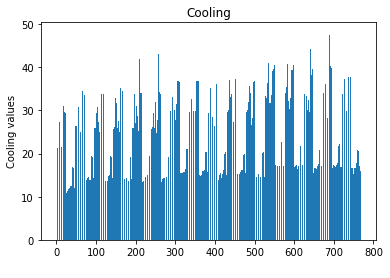

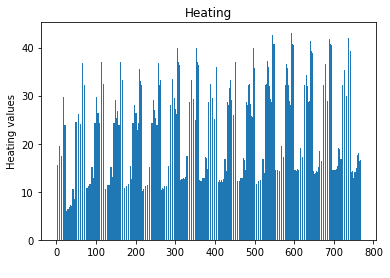

In [10]:
import matplotlib.pyplot as plt

x = list(range(0, 768))
    

plt.bar(x,ycooling)
plt.title('Cooling')
plt.xlabel(' ')
plt.ylabel('Cooling values')
plt.show()



plt.bar(x,yheating)
plt.title('Heating')
plt.xlabel(' ')
plt.ylabel('Heating values')
plt.show()

<AxesSubplot:>

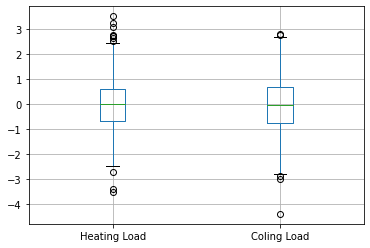

In [21]:
ad = pd.DataFrame(np.random.randn(768, 2),
                       columns=['Heating Load', 'Coling Load'] )
ad.boxplot()

In [76]:
# Se comprueba que se ha hecho bien con el tamaño de los datasets
energy.shape


(768, 8)

**Partición hold out**

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,ycooling,test_size=0.2, random_state=42)


In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

**Selección de atributos**

In [86]:
for i in X.columns:
    print(X.var()[i])


0.011188874402433754
7759.163841807892
1903.2698826597132
2039.9630595393185
3.0664928292046936
1.2516297262059974
0.017747718383311874
2.405475880052151


In [87]:
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [88]:
# Variance Threshold

selector = VarianceThreshold(0.3)
X_train_sel = selector.fit_transform(X_train)
df = pd.DataFrame(X_train_sel)
df

,0,1,2,3,4,5
0,612.5,318.5,147.00,7.0,2.0,1.0
1,784.0,343.0,220.50,3.5,4.0,2.0
2,588.0,294.0,147.00,7.0,4.0,2.0
3,563.5,318.5,122.50,7.0,4.0,1.0
4,759.5,318.5,220.50,3.5,5.0,4.0
...,...,...,...,...,...,...
609,661.5,416.5,122.50,7.0,5.0,1.0
610,588.0,294.0,147.00,7.0,4.0,2.0
611,710.5,269.5,220.50,3.5,4.0,5.0
612,514.5,294.0,110.25,7.0,5.0,4.0


**Estandarización de los datos**

In [89]:
X_train_std = {}


estandarizador = preprocessing.StandardScaler()
X_train_std = estandarizador.fit_transform(df)



In [90]:
X_train_std

array([[-0.6962224 , -0.00737214, -0.67904812,  1.01642146, -1.36441084,
        -1.1605984 ],
       [ 1.25066366,  0.55843925,  0.95706259, -0.98384385,  0.44108109,
        -0.51570481],
       [-0.97434898, -0.57318352, -0.67904812,  1.01642146,  0.44108109,
        -0.51570481],
       ...,
       [ 0.41628392, -1.13899491,  0.95706259, -0.98384385,  0.44108109,
         1.41897596],
       [-1.80872872, -0.57318352, -1.49710347,  1.01642146,  1.34382706,
         0.77408237],
       [-1.25247556, -0.00737214, -1.22441835,  1.01642146,  0.44108109,
        -0.51570481]])

**Comparación de modelos con cross_val_score**

In [91]:
# Se definen los algoritmos dentro de un diccionario y se hacen distintas ejecuciones cambiando los hiperparámetros
# del modelo hasta conseguir aquellos que den mejor resultado

k=5
algoritmos = {'OLS' : LinearRegression(),

              'KNN' : KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean', algorithm='kd_tree'),
             }

Se hace validación cruzada con 10 bolsas y se obtiene la metrica MAE para ambos algoritmos

In [92]:
resultados = {}
resultados['OLS'] = cross_val_score(algoritmos['OLS'], X_train_std, y_train, 
                                                 cv = KFold(n_splits=10, shuffle=True, random_state=42),
                                                 scoring='neg_mean_absolute_error')

print("OLS cross_val_MAE:   %0.4f +/- %0.4f" % (-resultados['OLS'].mean(), 
                                                            resultados['OLS'].std()))

resultados['KNN'] = cross_val_score(algoritmos['KNN'], X_train_std, y_train, 
                                                 cv = KFold(n_splits=10, shuffle=True, random_state=42),
                                                 scoring='neg_mean_absolute_error')
print("KNN cross_val_MAE:   %0.4f +/- %0.4f" % ( -resultados['KNN'].mean(), 
                                                             resultados['KNN'].std()))

OLS cross_val_MAE:   2.9335 +/- 0.1959
KNN cross_val_MAE:   2.4891 +/- 0.2604


**Modelo final**

En el paso anterior se ha utilizado validación cruzada para optimizar los hiperpámetros, y ahora se va a entrenar el modelo con todos los datos de entrenamiento. Los resultados se guardan en un diccionario.

In [93]:
modelo_definitivo_ols = {}
modelo_definitivo_knn = {}

modelo_definitivo_ols[('OLS')] = algoritmos['OLS'].fit(X_train_std, y_train)
modelo_definitivo_knn[('KNN')] = algoritmos['KNN'].fit(X_train_std, y_train)

In [94]:
y_train_pred_ols = {}
y_train_pred_knn = {}

y_train_pred_ols['OLS'] = cross_val_predict(modelo_definitivo_ols['OLS'], 
                                     X_train_std, y_train, 
                                     cv=KFold(n_splits=10, shuffle=True, random_state=42))


y_train_pred_knn['KNN'] = cross_val_predict(modelo_definitivo_knn['KNN'], 
                                     X_train_std, y_train, 
                                     cv=KFold(n_splits=10, shuffle=True, random_state=42))

**Estandarización y selección de atributos del conjunto de test**

In [95]:
X_test_sel = {}
X_test_sel = selector.transform(X_test)
X_test_std = {}
X_test_std = estandarizador.transform(X_test_sel)

In [96]:
# Se utilizan los modelos de KNN y OLS entrenados con el conjunto de entrenamiento para hacer predicciones con el conjunto 
# de test y evaluar los modelos creados.

y_test_pred_ols = {}
y_test_pred_knn = {}

y_test_pred_ols['OLS'] = cross_val_predict(modelo_definitivo_ols['OLS'], 
                                     X_test_std, y_test, 
                                     cv=KFold(n_splits=5, shuffle=True, random_state=42))


y_test_pred_knn['KNN'] = cross_val_predict(modelo_definitivo_knn['KNN'], 
                                     X_test_std, y_test, 
                                     cv=KFold(n_splits=5, shuffle=True, random_state=42))

**Métricas: MAE, RMSE, MAPE**

In [97]:
import sklearn.metrics as metrics

def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res


metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          math.sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

**Evaluación del conjunto de entrenamiento**

In [98]:
# Métricas correspondientes a LinearRegression()

import math

MAE =   metricas['MAE'](y_train, y_train_pred_ols['OLS'])
RMSE = metricas['RMSE'](y_train, y_train_pred_ols['OLS'])
MAPE = metricas['MAPE'](y_train, y_train_pred_ols['OLS'])
R2 = metricas['R2'](y_train, y_train_pred_ols[('OLS')])

print('MAE:  %.4f' % MAE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2: %.4f' % R2)

print('------------------')

MAE:  2.9333
RMSE: 3.8709
MAPE: 12.3181
R2: 0.8329
------------------


In [99]:
# Evaluación del algoritmo KNN y presentación de resultados.

results = evaluacion(y_train, y_train_pred_knn['KNN'], metricas)
results

{'MAE': 2.4902254679384472,
 'RMSE': 3.033996123645939,
 'MAPE': 10.99769608707967,
 'R2': 0.897331793692763}

**Evaluación del conjunto de test**

In [100]:


MAE =   metricas['MAE'](y_test, y_test_pred_ols['OLS'])
RMSE = metricas['RMSE'](y_test, y_test_pred_ols['OLS'])
MAPE = metricas['MAPE'](y_test,y_test_pred_ols['OLS'])
R2 =     metricas['R2'](y_test, y_test_pred_ols['OLS'])

print('MAE:  %.4f' % MAE)
print('RMSE: %.4f' % RMSE)
print('MAPE: %.4f' % MAPE)
print('R2:   %.4f' % R2)
print('-------------------------------')

MAE:  2.9158
RMSE: 3.7943
MAPE: 12.0107
R2:   0.8446
-------------------------------


In [101]:
# Evaluación y presentación de resultados.
results = evaluacion(y_test, y_test_pred_knn['KNN'], metricas)
results

{'MAE': 2.964509643911655,
 'RMSE': 3.8106266735358565,
 'MAPE': 11.81342509302277,
 'R2': 0.8432839556021147}

**Conclusion**

Explicar los resultados obtenidos.

<AxesSubplot:>

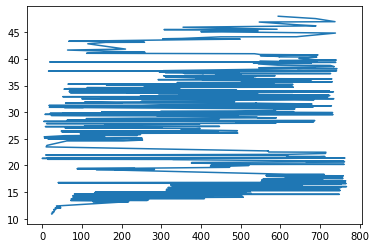

In [27]:
ycooling.sort_values().plot()